In [1]:
import numpy as np
import matplotlib.pyplot as plt

from random import uniform
from time   import time

### normal python

In [60]:
def python_speed_test(num_range, test_list_length, test_repetitions):
    # create lists and generate values
    py_list_1 = []
    py_list_2 = []
    for i in range(test_list_length):
        py_list_1.append( uniform(-num_range, test_range) )
        py_list_2.append( uniform(-num_range, test_range) )
    
    # timed test
    py_start_time = time()
    
    output_sum = 0
    for i in range(test_repetitions):
        output_list = []
        for j in range(test_list_length):
            output_list.append( (py_list_1[j]*py_list_2[j]) )
        output_sum += sum(output_list)
        
    py_end_time = (time()-py_start_time)
    
    
    return py_end_time
    

### numpy (float64)

In [61]:
def np_f64_speed_test(num_range, test_list_length, test_repetitions):
    # create lists and generate values
    np64_list_1 = np.random.uniform(-num_range, num_range, size=test_list_length)
    np64_list_2 = np.random.uniform(-num_range, num_range, size=test_list_length)
    
    # timed test
    np64_start_time = time()

    output_sum = 0
    for i in range(test_repetitions):
        output_list = np.multiply(np64_list_1, np64_list_2)
        output_sum += np.sum(output_list)

    np64_end_time = (time()-np64_start_time)
    
    
    return np64_end_time
    

### numpy (float32)

In [62]:
def np_f32_speed_test(num_range, test_list_length, test_repetitions):
    # create lists and generate values
    np64_list_1 = np.random.uniform(-num_range, num_range, size=test_list_length)
    np64_list_2 = np.random.uniform(-num_range, num_range, size=test_list_length)
    
    np32_list_1 = np64_list_1.astype(np.float32, casting='unsafe', copy=True)
    np32_list_2 = np64_list_2.astype(np.float32, casting='unsafe', copy=True)
    
    # timed test
    np32_start_time = time()

    output_sum = 0
    for i in range(test_repetitions):
        output_list = np.multiply(np32_list_1, np32_list_2)
        output_sum += np.sum(output_list)

    np32_end_time = (time()-np32_start_time)
    
    
    return np32_end_time


### constants

In [63]:
num_range = 1.0
test_repetitions = 100

### collecting speed data

In [64]:
list_lengths = [1_000, 10_000, 100_000, 1_000_000]

python_times = []
np_f64_times = []
np_f32_times = []

for list_length in list_lengths:
    python_times.append( python_speed_test(num_range, list_length, test_repetitions)*1000 )
    np_f64_times.append( np_f64_speed_test(num_range, list_length, test_repetitions)*1000 )
    np_f32_times.append( np_f32_speed_test(num_range, list_length, test_repetitions)*1000 )


In [80]:
results = [python_times, np_f64_times, np_f32_times]

python_line = ""
np_f64_line = ""
np_f32_line = ""

result_lines = ["Time (ms) of multiplying two lists (averaged over 100 repetitions)\n",
                "size    {:>8}  {:>8}  {:>8}  {:>8}".format("1k", "10k", "100k", "1000k"),
                "        --------  --------  --------  --------",
                "python  ", 
                "np_f64  ", 
                "np_f32  "
               ]

for i in range(len(results[0])):
    result_lines[-3] += "{:>8}  ".format( round(results[0][i], 2) )
    result_lines[-2] += "{:>8}  ".format( round(results[1][i], 2) )
    result_lines[-1] += "{:>8}  ".format( round(results[2][i], 2) )
               
#for line in result_lines:
    #print(line)

### graphing results

Time (ms) of multiplying two lists (averaged over 100 repetitions)

size          1k       10k      100k     1000k
        --------  --------  --------  --------
python      18.7    145.44   1672.21  17487.56  
np_f64      2.64      1.45     15.46    219.16  
np_f32      1.63      1.15      7.56     72.13  


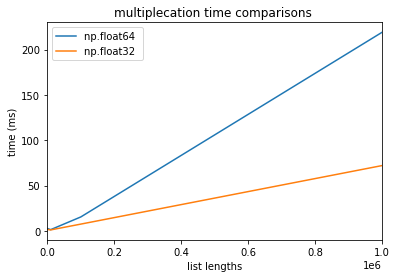

In [81]:
# print results
for line in result_lines:
    print(line)

# plot the lines
#plt.plot(list_lengths, python_times, label = "base python")
plt.plot(list_lengths, np_f64_times, label = "np.float64 ")
plt.plot(list_lengths, np_f32_times, label = "np.float32 ")

# labels
plt.xlabel('list lengths') # Set the y axis label of the current axis.
plt.ylabel('time (ms)') # Set a title of the current axes.
plt.title('multiplecation time comparisons ') 
plt.legend() # show a legend on the plot

plt.xlim(0, 1_000_000)
#plt.ylim(-1, 1)

# Display a figure.
plt.show()

# Testing other numpy features

In [113]:
test_array = np.array([[0,1,2], [3,4,5], [6,7,8]])
test_mult = np.array([-1,-2,-3])

mult_result = np.multiply(test_array, test_mult)

print(test_array, "\n")
print(mult_result)

[[0 1 2]
 [3 4 5]
 [6 7 8]] 

[[  0  -2  -6]
 [ -3  -8 -15]
 [ -6 -14 -24]]


In [114]:
sum_result = np.sum(mult_result, axis=1)

test_sum = np.array([4, 8, 16])
add_result = np.sum([sum_result, test_sum], axis=0)

print(sum_result)
print(add_result)

[ -8 -26 -44]
[ -4 -18 -28]


In [98]:
test_sum_array_1 = np.array([[ 0, 1, 2], [ 3, 4, 5], [ 6, 7, 8]])
test_sum_array_2 = np.array([[ 0,-1,-2], [-3,-4,-5], [-6,-7,-8]])

test_sum_array_3 = np.add(test_sum_array_1, test_sum_array_2)

test_sum_array_3

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [ ]:
'''
for me this means:
# list of weights connecting TO for EACH neuron in the following layer
test_array = [
              [weight_from_n0, weight_from_n2, ... ],
              [weight_from_n0, weight_from_n2, ... ],
              [weight_from_n0, weight_from_n2, ... ], 
              ...]

# list of values from neurons in the previous layer
test_mult  = [value_of_n0, value_of_n1, ... ]


# 


''';

In [94]:
test2 = np.random.uniform(-1.0, 1.0, size=(2,3))
test2

array([[-0.29568706,  0.52763607,  0.90084597],
       [ 0.01394084, -0.91549627, -0.16852127]])

In [96]:
base_list  = [1.1, 2.2, 3.3]
base_numpy = np.array(base_list).astype(np.float32, casting='unsafe', copy=True)

base_numpy

array([1.1, 2.2, 3.3], dtype=float32)

In [119]:
test1 = np.array([ [1.1, 2.2],
                   [4.4, 5.5],
                   [7.7, 8.8] ])

test3 = np.array([4.4, 5.5, 6.6])

test4 = test1 * test3[:, None]
test4

array([[ 4.84,  9.68],
       [24.2 , 30.25],
       [50.82, 58.08]])

In [128]:
710%100

10

In [126]:
for i in range(3):
    print( "{}{} line".format( ("\n"*(0+1)), i ), end='/r')
    
LINE_UP = '\033[1A'
LINE_CLEAR = '\x1b[2K'
print(LINE_UP*2, end=LINE_CLEAR)


0 line/r
1 line/r
2 line/r

In [ ]:
'''
(37,28) (37,) 
(37,56) (56,1)

''';

In [109]:
test1 = np.array([ [1.1, 2.2, 3.3],
                   [4.4, 5.5, 6.6],
                   [7.7, 8.8, 9.9] ])

test2 = np.transpose(test1)
test2

array([[1.1, 4.4, 7.7],
       [2.2, 5.5, 8.8],
       [3.3, 6.6, 9.9]])

In [112]:
list(range(-5,0))

[-5, -4, -3, -2, -1]

In [18]:
# test = np.random.uniform(-1.0, 1.0, size=10, dtype='np.float32')
x = np.random.uniform(-1.0, 1.0, size=10)
x

array([-0.4502267 ,  0.76162574,  0.63749814,  0.64755834, -0.23938371,
        0.34307774,  0.77311155,  0.20142181,  0.23097662,  0.37688703])

In [22]:
type(x[0])

numpy.float64

In [23]:
y = x.astype(np.float32, casting='unsafe', copy=True)
y

array([-0.4502267 ,  0.76162577,  0.63749814,  0.64755833, -0.23938371,
        0.34307775,  0.7731115 ,  0.20142181,  0.23097663,  0.37688702],
      dtype=float32)

In [24]:
type(y[0])

numpy.float32

In [25]:
z = np.empty(10, np.float32)

In [26]:
z

array([0.4502267 , 0.76162577, 0.63749814, 0.64755833, 0.23938371,
       0.34307775, 0.7731115 , 0.20142181, 0.23097663, 0.37688702],
      dtype=float32)

In [28]:
base = np.random.uniform(-1.0, 1.0, size=10).astype(np.float32, casting='unsafe', copy=True)
base

array([-0.12360931, -0.26496747,  0.50613344,  0.574816  , -0.24471769,
       -0.2321282 ,  0.19968747, -0.776678  ,  0.76834977, -0.93469745],
      dtype=float32)

In [ ]:
test1 = np.array([ [1.1, 2.2, 3.3],
                   [4.4, 5.5, 6.6],
                   [7.7, 8.8, 9.9] ])

test2 = np.array([ [1.1, 2.2, 3.3],
                   [4.4, 5.5, 6.6],
                   [7.7, 8.8, 9.9] ])

test3 = np.array([ [1.1, 2.2, 3.3],
                   [4.4, 5.5, 6.6],
                   [7.7, 8.8, 9.9] ])